In [214]:
#Install Required Libraries
!pip install yfinance
import pandas as pd
import yfinance as yf
import numpy as np


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [215]:
# Load the dataset
df = pd.read_csv(r"C:\Users\dbmcm\OneDrive\Documents\Cramer Stock Picks Project\cramerpicks500.csv")
df.drop(columns = ['Unnamed: 17', 'Unnamed: 18'], inplace = True)

In [216]:
#Replacing values that were not found in excel's Stock History function with 'NaN', so we can iterate through them in the next step and attempt to find historical stock prices. 
df.replace('#VALUE!', np.nan, inplace = True)
df.replace('#N/A', np.nan, inplace = True)
df[df['HistoricalPrice'].isna()]

,CallNumber,Company,Ticker,Date,Call,1-Day,1-Week,1-Month,1-Year,1-DayIndex,1-WeekIndex,1-MonthIndex,1-YearIndex,Sector,Industry,CurrentPrice,HistoricalPrice
220,635,Moderna,MRNA,6/24/2020,Negative Mention,-7.50%,-5.50%,28.90%,255%,1.30%,1.60%,5%,41%,Healthcare,Biotechnology,43.060,NaN
248,720,Iron Mountain,IRM,3/24/2020,Buy,1.20%,-11.30%,-6.10%,60%,0.80%,-0.30%,15%,60%,Real Estate,REIT - Specialty,123.670,NaN
313,905,Gilead Sciences,GILD,4/29/2020,Buy,-1.70%,-7.60%,-10.50%,-21%,-0.40%,-1.00%,5%,46%,Healthcare,Drug Manufacturers - General,92.580,NaN
316,913,Advanced Micro Devices,AMD,8/23/2018,Buy,4.70%,5.00%,36.00%,26%,0.40%,1.00%,2%,2%,Technology,Semiconductors,137.175,NaN
334,967,The Blackstone Group,BX,4/21/2017,Buy,-2.20%,4.20%,7.70%,15%,0.00%,0.60%,1%,15%,Financial Services,Asset Management,191.090,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11862,20838,American Express,AXP,1/24/2020,Buy,-0.40%,0.30%,-1.90%,-6%,0.10%,0.20%,0%,21%,Financial Services,Credit Services,304.680,NaN
11942,21010,3M,MMM,7/24/2017,Buy,-1.60%,1.90%,2.00%,5%,-0.10%,0.00%,-1%,17%,Industrials,Conglomerates,133.530,NaN
11969,21076,Advanced Micro Devices,AMD,1/24/2020,Buy,1.70%,-2.50%,-0.30%,91%,0.10%,0.20%,0%,21%,Technology,Semiconductors,137.175,NaN
12004,21171,Carnival,CCL,6/24/2016,Negative Mention,0.00%,0.30%,6.10%,55%,-1.00%,4.40%,9%,24%,Consumer Cyclical,Travel Services,25.430,NaN


In [217]:
## This is to fetch historical values from yahoofinance for those that weren't found using Excel's Stock History function. 

for index, row in df.iterrows():
    if pd.isna(row['HistoricalPrice']):  # Check if value is NaN
        try:
            ticker = row['Ticker']
            stock = yf.download(ticker, period='1d')
            if not stock.empty:
                df.at[index, 'HistoricalPrice'] = stock['Close'].iloc[0]
            else:
                df.at[index, 'HistoricalPrice'] = np.nan
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")
            df.at[index, 'HistoricalPrice'] = np.nan

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [63]:
#All missing values seem to be imported now. 
df.head()

,CallNumber,Company,Ticker,Date,Call,1-Day,1-Week,1-Month,1-Year,1-DayIndex,1-WeekIndex,1-MonthIndex,1-YearIndex,Sector,Industry,CurrentPrice,HistoricalPrice
0,1,Lululemon Athletica,LULU,3/27/2018,Positive Mention,2.00%,2.70%,15.40%,95%,-0.40%,1.40%,3%,10%,Consumer Cyclical,Apparel Retail,320.66,78.71
1,3,Simon Property Group,SPG,11/13/2020,Buy,-1.20%,8.20%,10.60%,121%,0.40%,-1.40%,1%,31%,Real Estate,REIT - Retail,183.60,74.70
2,5,Broadcom,AVGO,6/2/2016,Positive Mention,-1.90%,-1.10%,-7.00%,58%,0.00%,-0.10%,0%,18%,Technology,Semiconductors,162.08,15.49
3,8,Apple,AAPL,7/30/2020,Buy,3.30%,4.80%,21.70%,38%,0.20%,2.50%,7%,36%,Technology,Consumer Electronics,237.33,96.19
4,9,United Continental,UAL,1/15/2019,Buy,-0.60%,-4.00%,2.30%,4%,0.10%,0.90%,6%,29%,Industrials,Airlines,96.83,81.20


In [244]:
# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])


In [220]:
today = pd.to_datetime("2024-11-30")
# Calculate years since recommendation
df['Time Since Recommendation'] = (today - df['Date'])
df['Years Since Recommendation'] = df['Time Since Recommendation'].dt.days / 365.25


In [221]:
df.head()

,CallNumber,Company,Ticker,Date,Call,1-Day,1-Week,1-Month,1-Year,1-DayIndex,1-WeekIndex,1-MonthIndex,1-YearIndex,Sector,Industry,CurrentPrice,HistoricalPrice,Time Since Recommendation,Years Since Recommendation
0,1,Lululemon Athletica,LULU,2018-03-27,Positive Mention,2.00%,2.70%,15.40%,95%,-0.40%,1.40%,3%,10%,Consumer Cyclical,Apparel Retail,320.66,78.71,2440 days,6.680356
1,3,Simon Property Group,SPG,2020-11-13,Buy,-1.20%,8.20%,10.60%,121%,0.40%,-1.40%,1%,31%,Real Estate,REIT - Retail,183.60,74.70,1478 days,4.046543
2,5,Broadcom,AVGO,2016-06-02,Positive Mention,-1.90%,-1.10%,-7.00%,58%,0.00%,-0.10%,0%,18%,Technology,Semiconductors,162.08,15.49,3103 days,8.495551
3,8,Apple,AAPL,2020-07-30,Buy,3.30%,4.80%,21.70%,38%,0.20%,2.50%,7%,36%,Technology,Consumer Electronics,237.33,96.19,1584 days,4.336756
4,9,United Continental,UAL,2019-01-15,Buy,-0.60%,-4.00%,2.30%,4%,0.10%,0.90%,6%,29%,Industrials,Airlines,96.83,81.20,2146 days,5.875428


In [222]:
# Ensure 'CurrentPrice' and 'HistoricalPrice' are numeric
df['CurrentPrice'] = pd.to_numeric(df['CurrentPrice'], errors='coerce')
df['HistoricalPrice'] = pd.to_numeric(df['HistoricalPrice'], errors='coerce')

In [223]:

df['Total Yield'] = 100 * (df['CurrentPrice'] - df['HistoricalPrice']) / df['HistoricalPrice']
df['Annual Yield']=df['Total Yield']/df['Years Since Recommendation']

# I decided to eliminate all rows in which Annual Yield was calculated to be above 500%. Clearly some historical values from Excel and/or YF were incorrect, which led to highly inflated outliers. This will allow more reasonable calculation of averages. 
df = df[df['Annual Yield']<500]

In [224]:
df.head()

,CallNumber,Company,Ticker,Date,Call,1-Day,1-Week,1-Month,1-Year,1-DayIndex,...,1-MonthIndex,1-YearIndex,Sector,Industry,CurrentPrice,HistoricalPrice,Time Since Recommendation,Years Since Recommendation,Total Yield,Annual Yield
0,1,Lululemon Athletica,LULU,2018-03-27,Positive Mention,2.00%,2.70%,15.40%,95%,-0.40%,...,3%,10%,Consumer Cyclical,Apparel Retail,320.66,78.71,2440 days,6.680356,307.394232,46.014649
1,3,Simon Property Group,SPG,2020-11-13,Buy,-1.20%,8.20%,10.60%,121%,0.40%,...,1%,31%,Real Estate,REIT - Retail,183.60,74.70,1478 days,4.046543,145.783133,36.026583
2,5,Broadcom,AVGO,2016-06-02,Positive Mention,-1.90%,-1.10%,-7.00%,58%,0.00%,...,0%,18%,Technology,Semiconductors,162.08,15.49,3103 days,8.495551,946.352485,111.393891
3,8,Apple,AAPL,2020-07-30,Buy,3.30%,4.80%,21.70%,38%,0.20%,...,7%,36%,Technology,Consumer Electronics,237.33,96.19,1584 days,4.336756,146.730429,33.834147
4,9,United Continental,UAL,2019-01-15,Buy,-0.60%,-4.00%,2.30%,4%,0.10%,...,6%,29%,Industrials,Airlines,96.83,81.20,2146 days,5.875428,19.248768,3.276148


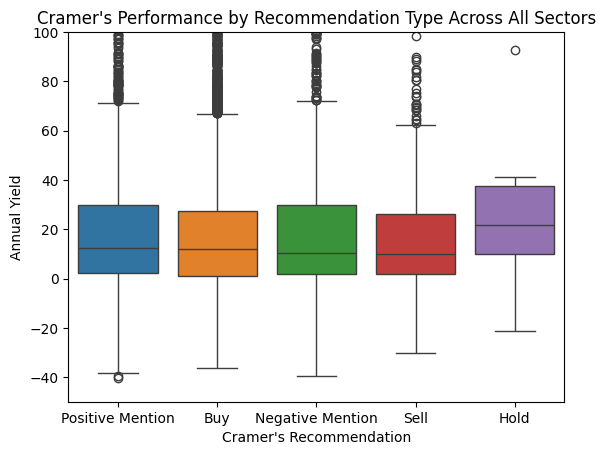

In [247]:
#Visualizing Cramer's Recommendation Record by Type of Call, using boxplots. 

import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df, x='Call', y='Annual Yield', hue='Call')
plt.ylim(-50, 100)
plt.title("Cramer's Performance by Recommendation Type Across All Sectors")
plt.xlabel("Cramer's Recommendation")
plt.show()

In [226]:
#Checking the actual median values for each type of call

df_median = df['Annual Yield'].groupby(df['Call']).median()
df_median = pd.DataFrame(df_median)
df_median

,Annual Yield
Call,
Buy,12.040866
Hold,21.721197
Negative Mention,10.607805
Positive Mention,12.641694
Sell,9.793216


Text(0.5, 1.0, 'Cramer Median Performance by Sector')

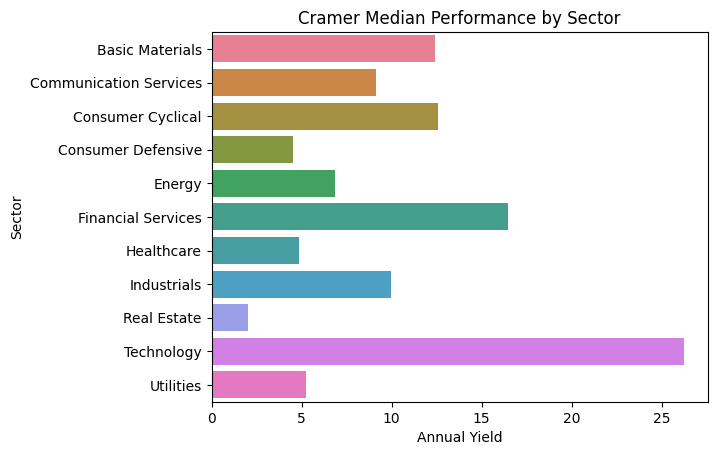

In [227]:
#Vizualizing the average performance for each sector Cramer's made calls in (ignoring whether calls were to buy or sell). 

df_median_sector = df['Annual Yield'].groupby(df['Sector']).median()
df_median_sector = pd.DataFrame(df_median_sector)
sns.barplot(data = df_median_sector, x = 'Annual Yield', y = 'Sector', hue = 'Sector')
plt.title("Cramer Median Performance by Sector")

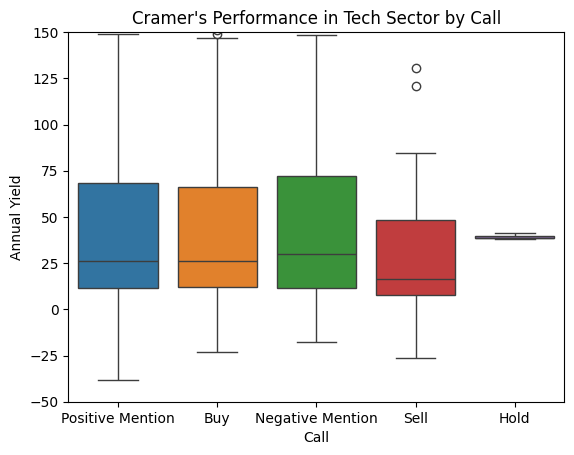

In [228]:
# Cramer's best Industry - Technology

df_tech = df[df['Sector'] == 'Technology']
sns.boxplot(data=df_tech, x='Call', y='Annual Yield', hue='Call')
plt.ylim(-50, 150)
plt.title("Cramer's Performance in Tech Sector by Call")
plt.show()


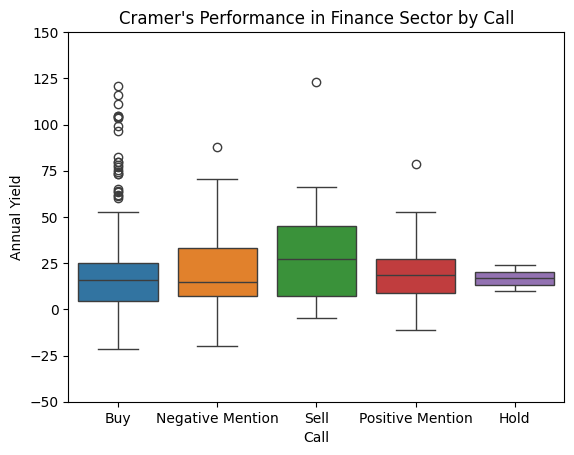

In [229]:
# Cramer's 2nd best Industry - Financial Services
df_finance = df[df['Sector'] == 'Financial Services']
sns.boxplot(data=df_finance, x='Call', y='Annual Yield', hue='Call')
# Set the y-axis limits
plt.ylim(-50, 150)
plt.title("Cramer's Performance in Finance Sector by Call")
# Show the plot
plt.show()

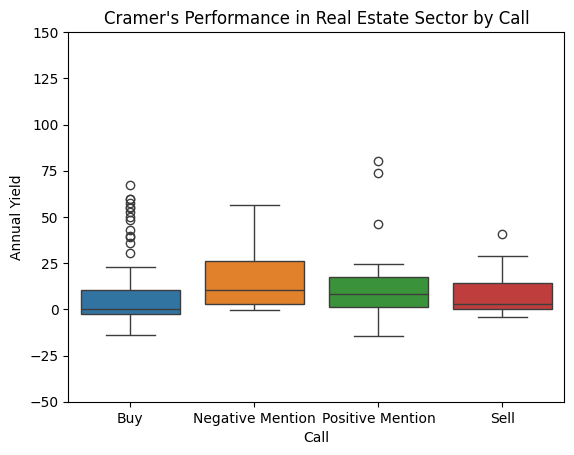

In [230]:
# Cramer's worst Industry - Real Estate
df_real = df[df['Sector'] == 'Real Estate']
sns.boxplot(data=df_real, x='Call', y='Annual Yield', hue='Call')
# Set the y-axis limits
plt.ylim(-50, 150)
plt.title("Cramer's Performance in Real Estate Sector by Call")
# Show the plot
plt.show()

In [231]:
#How do Cramer's calls do by year?
df['Year'] = df['Date'].dt.year
df_year_call = (
    df.groupby(['Year', 'Call'])['Annual Yield']
    .median()
    .reset_index()
)
df_year_call.rename(columns={'Annual Yield': 'Average Annual Yield'}, inplace=True)
df_year_call


,Year,Call,Average Annual Yield
0,2016,Buy,13.460713
1,2016,Hold,22.079468
2,2016,Negative Mention,10.249864
3,2016,Positive Mention,16.586144
4,2016,Sell,16.600863
5,2017,Buy,16.699166
6,2017,Hold,10.134197
7,2017,Negative Mention,9.753202
8,2017,Positive Mention,15.170360
9,2017,Sell,6.651895


Text(0.5, 1.0, "How Cramer's Recommendations Did From Inception to Present")

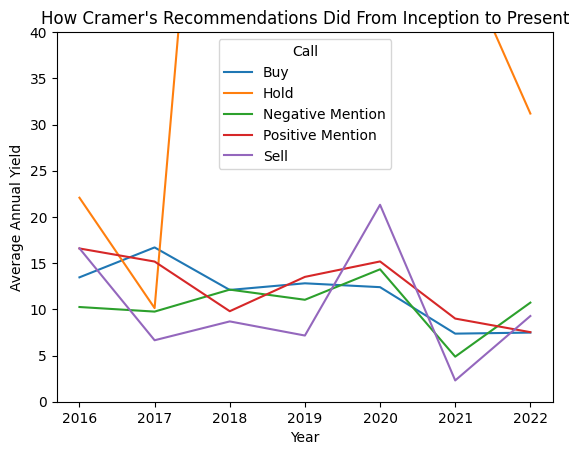

In [232]:
sns.lineplot(data = df_year_call, x = 'Year', y = 'Average Annual Yield', hue = 'Call')
plt.ylim(0, 40)
plt.title("How Cramer's Recommendations Did From Inception to Present")

In [238]:
df['Performance'] = df['1-Year']-df['1-YearIndex']

In [242]:
df['Performance'].groupby(df['Call']).median()
df.head()
df['Performance'].mean()

6.128247458510731

In [245]:
df.sort_values('Annual Yield', ascending = False)

,CallNumber,Company,Ticker,Date,Call,1-Day,1-Week,1-Month,1-Year,1-DayIndex,...,Sector,Industry,CurrentPrice,HistoricalPrice,Time Since Recommendation,Years Since Recommendation,Total Yield,Annual Yield,Year,Performance
11975,21091,Targa Resources,TRGP,2020-04-13,Sell,5.60%,-9.70%,64.70%,287.0,1.00%,...,Energy,Oil & Gas Midstream,204.30,8.55,1692 days,4.632444,2289.473684,494.225924,2020,240.0
10454,18125,NVIDIA,NVDA,2019-04-08,Buy,-0.60%,-0.60%,-10.10%,42.0,-0.10%,...,Technology,Semiconductors,138.25,4.79,2063 days,5.648186,2786.221294,493.294875,2019,45.0
294,845,NVIDIA,NVDA,2017-06-07,Buy,4.20%,-4.70%,-3.90%,64.0,0.00%,...,Technology,Semiconductors,138.25,3.73,2733 days,7.482546,3606.434316,481.979559,2017,48.0
11786,20668,NVIDIA,NVDA,2017-06-09,Buy,2.80%,4.90%,2.50%,74.0,0.10%,...,Technology,Semiconductors,138.25,3.74,2731 days,7.477070,3596.524064,481.007109,2017,57.0
285,820,NVIDIA,NVDA,2017-06-12,Buy,-1.90%,3.80%,6.10%,74.0,0.20%,...,Technology,Semiconductors,138.25,3.75,2728 days,7.468857,3586.666667,480.216276,2017,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12120,21469,The EstÃ©e Lauder Companies Inc.,EL,2022-12-21,Buy,0.80%,NaN,NaN,NaN,NaN,...,Consumer Defensive,Household & Personal Products,72.12,243.87,710 days,1.943874,-70.426867,-36.230159,2022,NaN
12222,21640,"Enphase Energy, Inc.",ENPH,2022-11-28,Positive Mention,-3.00%,2.10%,NaN,NaN,NaN,...,Technology,Solar,71.35,312.21,733 days,2.006845,-77.146792,-38.441836,2022,NaN
12104,21444,"Walgreens Boots Alliance, Inc.",WBA,2022-12-22,Negative Mention,0.20%,NaN,NaN,NaN,NaN,...,Healthcare,Pharmaceutical Retailers,9.02,38.44,709 days,1.941136,-76.534860,-39.427867,2022,NaN
12170,21536,"Walgreens Boots Alliance, Inc.",WBA,2022-12-14,Positive Mention,-1.50%,-2.80%,NaN,NaN,NaN,...,Healthcare,Pharmaceutical Retailers,9.02,40.63,717 days,1.963039,-77.799655,-39.632251,2022,NaN
